![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Modelling fish traps: Incorporating population size of salmon

In a [previous notebook on fish traps](http://tinyurl.com/y4yya4cg) we learned about the crescent element -  a type of intertidal modification used by Northern First Nations to trap fish, such as salmon. In this notebook, we will explore the impact of harvesting salmon on the salmon population size over the course of several years. 

To learn more about how harvesting impacts salmon population, we have created a mathematical model. In this notebook, we will generate plots using that model and understand how harvesting impacts salmon populations. 


### What is a Mathematical Model

A mathematical model is a description of a system using <b>mathematical concepts</b> and <b>mathematical language</b>.

You can think of a math model as a tool to help us describe what we believe about the workings of phenomena in the world. 

<b>We use the language of mathematics to express our beliefs.</b>

<b>We use mathematics (theoretical and numerical analysis) to evaluate the model, and get insights about the original phenomenon.</b>

### How do we model a problem using mathematics?


|Step | Description |
|-|-|
|1| <font color=#000000><b>Choose what phenomenon you want to model|</b></font>
|2| <font color=#000000><b>What assumptions are you making about the phenomenon|1|</b></font>   
|3| <font color=#000000><b>Use a flow diagram to help you determine the structure of your model|1|</b></font>
|4| <font color=#000000><b>Choose equations|2|</b></font>
|5| <font color=#000000><b>Implement equations using Python|2|</b></font>
|6| <font color=#000000><b>Solve equations|2|</b></font>
|7| <font color=#000000><b>Study the behaviour of the model|3|</b></font>
|8| <font color=#000000><b>Test the model|3|</b></font>
|9| <font color=#000000><b>Use the model|3|</b></font>

### Our phenomenon of interest: impact of harvesting on salmon population size

Before we can choose assumptions, we need to take time to understand the phenomenon. 

Run the cell below. A YouTube video window will display. Play the video below to learn about the life cycle of salmon. 

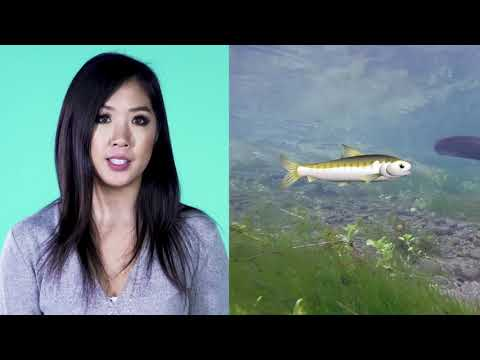

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("nkXthUsnRz4")

## Model Assumptions

* We are picking pink salmon for our model. This is species is the smallest and most abundant of the Pacific salmon. 

* Pink salmon in their native range have <b>a strict two year life cycle</b>, thus <b>odd and even-year populations do not interbreed</b>. 

* Adult pink salmon enter spawning streams from the ocean, usually returning to the stream where they originated. 

* We assume <b>harvesting occurs when the salmon are adults returning from the ocean into the spawning streams, before they spawn</b>.

* This last assumption implies that if salmon was harvested, it did not reach the spawning stream and thus <b>could not reproduce</b>. 

<img src="http://www.riversportfishing.com/wp-content/uploads/salmon-pink-wm.jpg" alt="Pink salmon" style="width: 600px;"/>

<em> Image source: http://www.riversportfishing.com/fishing-info/salmon-bc/pink-salmon/</em>

### Flow diagram

We can use a flow diagram - a visual representation of our phenomenon - to represent the life cycle of salmon. 

Use the flow diagram below, along with the video and information on our assumptions, to identify when we assume harvesting is happening. 


In the diagram:

- a rectangle	🔲 represents a stage in the cycle

- a diamond 🔷 represents salmon's potential death in the cycle

- arrows indicate moving from one stage to another

<img src="./images/Life_Cycle.png" alt="Salmon life cycle" style="width: 800px;"/>

#### Your answer here ✏️

Double click this cell to identify when harvesting takes place in our model. Use the numbers in the diamons to identify when you think the salmon died due harvesting in our model. 

## Key variables

We can identify several key variables. The variables are summarized in the table below. On the left, a mathematical symbol has been assigned. The definition can be found on the right. 


|  Symbol  |  Definition                    |
|----------|--------------------------------|
|  $i$     | Geographic Location            |
| $j$      |  Odd/even lineage              |
| $S$      |  Stock Abundance               |
| $R$      |  Recruitment                   |
| $\theta$ | Random pertubation of r        |
| $b$      | Densitity dependent mortaility |
| $r$      | Population growth rate          |
|$\epsilon$| Environmental stochasticity    |
| $t$      | Time                           |
| $N$      | Abundance                      |
| $c$      | Inter-population $b$           |

## Model

The model used is an adaptation of the [Ricker Population Model](https://en.wikipedia.org/wiki/Ricker_model).

The Ricker model, named after Bill Ricker, is a classic discrete population model that is used to determine the expected number of individuals in generation as a function of the number of individuals in the previous generation. This model is popular when determining the number of fish that will be present in a fishery. 


[![Watch this video to learm more](https://img.youtube.com/vi/7DNhqtYf47E/0.jpg)](https://www.youtube.com/watch?v=7DNhqtYf47E)


This notebook's code is based on an adaptation for the Ricker model by Krkosek <em>et al.</em> whose focus is on modelling pink salmon populations, and in particular, its even/odd spawning pattern:


$$ R_{t} = S_{t-2} e^{r - b S_{t-2}+ \epsilon_{t}} $$
$$ \ln\left[\frac{R_{t}}{S_{t-2}}\right]= r+\theta -bS_{t-2}+\epsilon_{t}$$
Adding in additional assumptions about locations:
$$ \ln\left[\frac{R_{i,t}}{S_{i,t-2}}\right]= \left(r+\theta_i\right) -b_iS_{i,t-2}+\epsilon_{i,t}$$
Showing interdependence and measuring abundance (3.1 in the paper):
$$ N_t = N_{t-2}e^{r-bN_{t-2}-cbN_{t-1}}$$

[1] Krkosek, M., Hilborn, R., Peterman, R. M., & Quinn, T. P. (2011). Cycles, stochasticity and density dependence in pink salmon population dynamics. Proceedings. Biological sciences, 278(1714), 2060–2068. https://doi.org/10.1098/rspb.2010.2335

### Implement our model using Python

In the next cell we will execute Python code containing functions that implement our model. 

Run the cell below to call the functions.

In [2]:
%run -i ./scripts/rickers_adaptation.py
f2 = Fishtrap(r=1.36,  b=0.00136, c=0.8, N1=500, N2=300)
print("Success! Functions imported")

Success! Functions imported


Run the cell below to display the projected population for fish in two populations:

1. Odd year population

2. Even year population

The red line denotes the even year salmon populatio, while the blue line denotes the odd year population. The black vertical line denotes when harvesting started taking place. 

Choose how many fish you want to harvest using the slider called "quota". Observe how the two populations are affected by the harvesting. 

A pie chart with the total harvested fish will be displayed on the right hand side. 

<b> Remember: these populations do not interbreed! </b>

In [3]:
interactive_plot = interact(f2.make_output_quota, quota=(0, 100, 25))
interactive_plot;

interactive(children=(IntSlider(value=50, description='quota', step=25), Output()), _dom_classes=('widget-inte…

#### ✏️ Reflect: Why are the two species affected differently in terms of population size?

Double click this cell to enter your thoughts on the relationship between harvested fish and total population size for the odd and even year populations. 

## What quota would kill a population in less than ten years? 

Run the code below to run the model and determine how long it would take for a population to die with a quota of your choice. 

In [4]:
interactive_plot = interact(f2.make_output_quota, quota=(0, 800, 5))
interactive_plot;

interactive(children=(IntSlider(value=400, description='quota', max=800, step=5), Output()), _dom_classes=('wi…

#### ✏️ Reflect: What population died within 10 years? What was your quota? 

Double click this cell to enter the quota that kills an entire population, identify which population died, and how long it took for the population to die.

#### ✏️ Reflect: What quota kills both populations within 10 years?


[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)